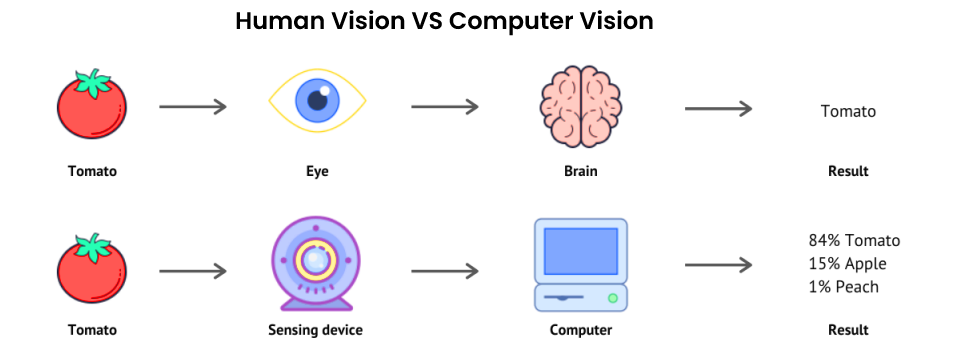
<br>

# Computer Vision
---
Computer vision is a branch of artificial intelligence (AI) that enables computers to extract meaningful information from images, videos, and other visual inputs.

## Notebook Description
---
This notebook serves as an introduction to computer vision using PyTorch, utilizing the popular dataset [MNIST](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST).

### Steps
1. Import necessary libraries.
2. Download training and testing data using PyTorch.
3. Load training and testing data.
4. Visualize a sample from the training set.
5. Define device and create neural network.
6. Define model and loss function.
7. Train the data.
8. Save the model.
9. Load the model.
10. Make predictions.

### Requirements

**Python.** Python is an interpreted, high-level and general-purpose programming language.

**Integrated Development Environment (IDE).** Any IDE that can be used to view, edit, and run Python code, such as:

- Google Colab
- Jupyter Notebook.

### Packages
Install the following packages in Python prior to running the code.

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## Download training and testing data using PyTorch.

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 34133625.21it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 1018066.78it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 8370297.56it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 2489289.01it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Load training and testing data.

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## Visualize a sample from the training set.

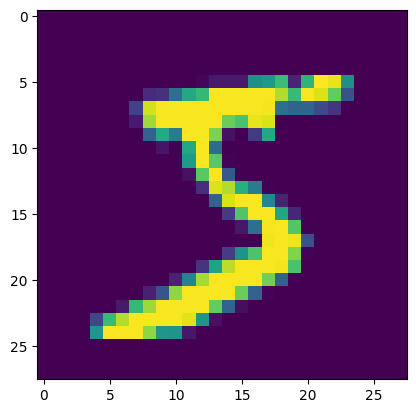

In [4]:
# Iterate over the DataLoader and check the data
for images, labels in train_dataloader:
    # Visualize or process the images as needed
    # For example, you can visualize the first image in the batch
    import matplotlib.pyplot as plt
    plt.imshow(images[0].permute(1, 2, 0))  # Assuming images are in format (channels, height, width)
    plt.show()
    
    # Break the loop to only check the first batch
    break

## Define device and create neural network.

In [5]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Define model and loss function.

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

## Train the data.

In [7]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [8]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300369  [   64/60000]
loss: 2.289933  [ 6464/60000]
loss: 2.295402  [12864/60000]
loss: 2.290065  [19264/60000]
loss: 2.291976  [25664/60000]
loss: 2.283067  [32064/60000]
loss: 2.266500  [38464/60000]
loss: 2.278892  [44864/60000]
loss: 2.265213  [51264/60000]
loss: 2.249567  [57664/60000]
Test Error: 
 Accuracy: 45.5%, Avg loss: 2.257101 

Epoch 2
-------------------------------
loss: 2.254750  [   64/60000]
loss: 2.244092  [ 6464/60000]
loss: 2.254990  [12864/60000]
loss: 2.232039  [19264/60000]
loss: 2.243789  [25664/60000]
loss: 2.234667  [32064/60000]
loss: 2.206575  [38464/60000]
loss: 2.235516  [44864/60000]
loss: 2.207804  [51264/60000]
loss: 2.182505  [57664/60000]
Test Error: 
 Accuracy: 58.6%, Avg loss: 2.194604 

Epoch 3
-------------------------------
loss: 2.191264  [   64/60000]
loss: 2.176237  [ 6464/60000]
loss: 2.195895  [12864/60000]
loss: 2.146163  [19264/60000]
loss: 2.170503  [25664/60000]
loss: 2.158035  [32064/600

## Save the model.

In [10]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


## Load the model.

In [11]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

## Make predictions.

In [12]:
classes = []
for _, label in train_dataloader.dataset:
    if label not in classes:
        classes.append(label)
        
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "6", Actual: "6"


## Acknowledgements
Pytorch - [Quick Start](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)